# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]
- **ID Dicoding:** [dhimassena]

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda berbeda berdasarkan musim (spring, summer, fall, winter)?
- Apakah jumlah penyewaan sepeda berbeda secara signifikan pada hari libur dibandingkan dengan hari kerja?
- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
- Pada jam-jam berapa saja penyewaan sepeda terjadi paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
hour_df = pd.read_csv("data/hour.csv")
day_df = pd.read_csv("data/day.csv")

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data set hour dan day mengandung 15 kolom atribut data
- Setiap kolom atribut pada kedua data set memiliki tipe data yang berbeda-beda, mulai int64 (tipe data diskrit), float64 (tipe data kontinu), dan object

### Assessing Data

In [13]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
hour_df.duplicated().sum()

0

In [19]:
day_df.duplicated().sum()

0

**Insight:**
- Dataset hour dan day tidak terdapat nilai null / missing value
- Dataset hour dan day tidak terdapat nilai duplikat / duplicated value

### Cleaning Data

In [8]:
# Mengubah tipe data kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [10]:
# Melakukan konversi nilai pada kolom tahun (yr) dari 0 menjadi 2011 dan 1 menjadi 2012
hour_df["yr"] = hour_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
# Mengubah tipe data kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [14]:
# Melakukan konversi nilai pada kolom tahun (yr) dari 0 menjadi 2011 dan 1 menjadi 2012
day_df["yr"] = day_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data kolom dteday pada kedua data set dari yang awalnya object menjadi datetime
- Melakukan konversi nilai pada kolom tahun (yr) dari 0 menjadi 2011 dan 1 menjadi 2012
- Masing-masing kolom sudah memiliki tipe data ayang sesuai
- Untuk kolom dengan jenis data kategorikal-nominal lainnya seperti season, mnth, holiday, weekday, workingday, weathersit, akan diubah menjadi tipe data string pada tahap EDA


## Exploratory Data Analysis (EDA)

### EDA 1

In [16]:
cnt_per_yr = day_df.groupby(by=['yr']).agg({
    'cnt': 'sum',
}).reset_index()
cnt_per_yr

,yr,cnt
0,2011,1243103
1,2012,2049576


**Insight:**
- Melihat jumlah penyewaan sepeda secara umum pada tahun 2011 dan 2012

### EDA 2

In [18]:
cnt_per_yr_season = day_df.groupby(by=['yr','season']).agg({
    'cnt': 'sum',
}).reset_index()
cnt_per_yr_season

,yr,season,cnt
0,2011,1,150000
1,2011,2,347316
2,2011,3,419650
3,2011,4,326137
4,2012,1,321348
5,2012,2,571273
6,2012,3,641479
7,2012,4,515476


In [20]:
def season_conv(x):
    if x == 1:
        return "Spring"
    elif x == 2:
        return "Summer"
    elif x == 3:
        return "Fall"
    elif x == 4:
        return "Winter"

cnt_per_yr_season["season_str"] = cnt_per_yr_season["season"].apply(season_conv)
cnt_per_yr_season

,yr,season,cnt,season_str
0,2011,1,150000,Spring
1,2011,2,347316,Summer
2,2011,3,419650,Fall
3,2011,4,326137,Winter
4,2012,1,321348,Spring
5,2012,2,571273,Summer
6,2012,3,641479,Fall
7,2012,4,515476,Winter


**Insight:**
- Melakukan group by pada kolom yr dan season dengan agg jumlah penyewaan sepeda
- Melakukan konversi nilai pada kolom season menjadi bernilai str pada kolom season_str

### EDA 3

In [22]:
cnt_per_yr_workingday = hour_df.groupby(by=['yr','workingday']).agg({
    'cnt': 'sum',
}).reset_index()
cnt_per_yr_workingday

,yr,workingday,cnt
0,2011,0,386839
1,2011,1,856264
2,2012,0,613430
3,2012,1,1436146


In [24]:
cnt_per_yr_workingday["workingday_str"] = cnt_per_yr_workingday["workingday"].apply(lambda x: "Workingday" if x == 1 else "Holiday/\nSaturday/\nSunday")
cnt_per_yr_workingday

,yr,workingday,cnt,workingday_str
0,2011,0,386839,Holiday/\nSaturday/\nSunday
1,2011,1,856264,Workingday
2,2012,0,613430,Holiday/\nSaturday/\nSunday
3,2012,1,1436146,Workingday


**Insight:**
- Melakukan group by pada kolom yr dan workingday dengan agg jumlah penyewaan sepeda
- Melakukan konversi nilai pada kolom workingday menjadi bernilai str pada kolom workingday_str

### EDA 4

In [26]:
cnt_per_yr_weathersit = day_df.groupby(by=['yr','weathersit']).agg({
    'cnt': 'sum',
}).reset_index()
cnt_per_yr_weathersit

,yr,weathersit,cnt
0,2011,1,835067
1,2011,2,382924
2,2011,3,25112
3,2012,1,1422885
4,2012,2,613934
5,2012,3,12757


In [28]:
cnt_per_yr_weathersit.loc[len(cnt_per_yr_weathersit.index)] = [2011, 4, 0]
cnt_per_yr_weathersit.loc[len(cnt_per_yr_weathersit.index)] = [2012, 4, 0]
cnt_per_yr_weathersit

,yr,weathersit,cnt
0,2011,1,835067
1,2011,2,382924
2,2011,3,25112
3,2012,1,1422885
4,2012,2,613934
5,2012,3,12757
6,2011,4,0
7,2012,4,0


In [30]:
def weathersit_conv(x):
    if x == 1:
        return "Clear"
    elif x == 2:
        return "Mist Cloudy"
    elif x == 3:
        return "Light Rain/Snow"
    elif x == 4:
        return "Heavy Rain/Snow\nThunderstorm"

cnt_per_yr_weathersit["weathersit_str"] = cnt_per_yr_weathersit["weathersit"].apply(weathersit_conv)
cnt_per_yr_weathersit

,yr,weathersit,cnt,weathersit_str
0,2011,1,835067,Clear
1,2011,2,382924,Mist Cloudy
2,2011,3,25112,Light Rain/Snow
3,2012,1,1422885,Clear
4,2012,2,613934,Mist Cloudy
5,2012,3,12757,Light Rain/Snow
6,2011,4,0,Heavy Rain/Snow\nThunderstorm
7,2012,4,0,Heavy Rain/Snow\nThunderstorm


**Insight:**
- Melakukan group by pada kolom yr dan weathersit dengan agg jumlah penyewaan sepeda
- Menambahkan row cuaca indeks ke-4 sesuai keterangan pada Bike Sharing Dataset, dikarenakan tidak ada
penyewaan sepeda pada kondisi cuaca tersebut di dalam dataset
- Melakukan konversi nilai pada kolom weathersit menjadi bernilai str pada kolom weathersit_str

### EDA 5

In [32]:
cnt_per_yr_hr = hour_df.groupby(by=['yr','hr']).agg({
    'cnt': 'sum',
}).reset_index()
cnt_per_yr_hr

,yr,hr,cnt
0,2011,0,15540
1,2011,1,9558
2,2011,2,6661
3,2011,3,3441
4,2011,4,1817
5,2011,5,5157
6,2011,6,20801
7,2011,7,56930
8,2011,8,95467
9,2011,9,59486


**Insight:**
- Melakukan group by pada kolom yr dan hr dengan agg jumlah penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:
### Bagaimana jumlah penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

Text(37.33862499999999, 0.5, 'Count of bikes rented')

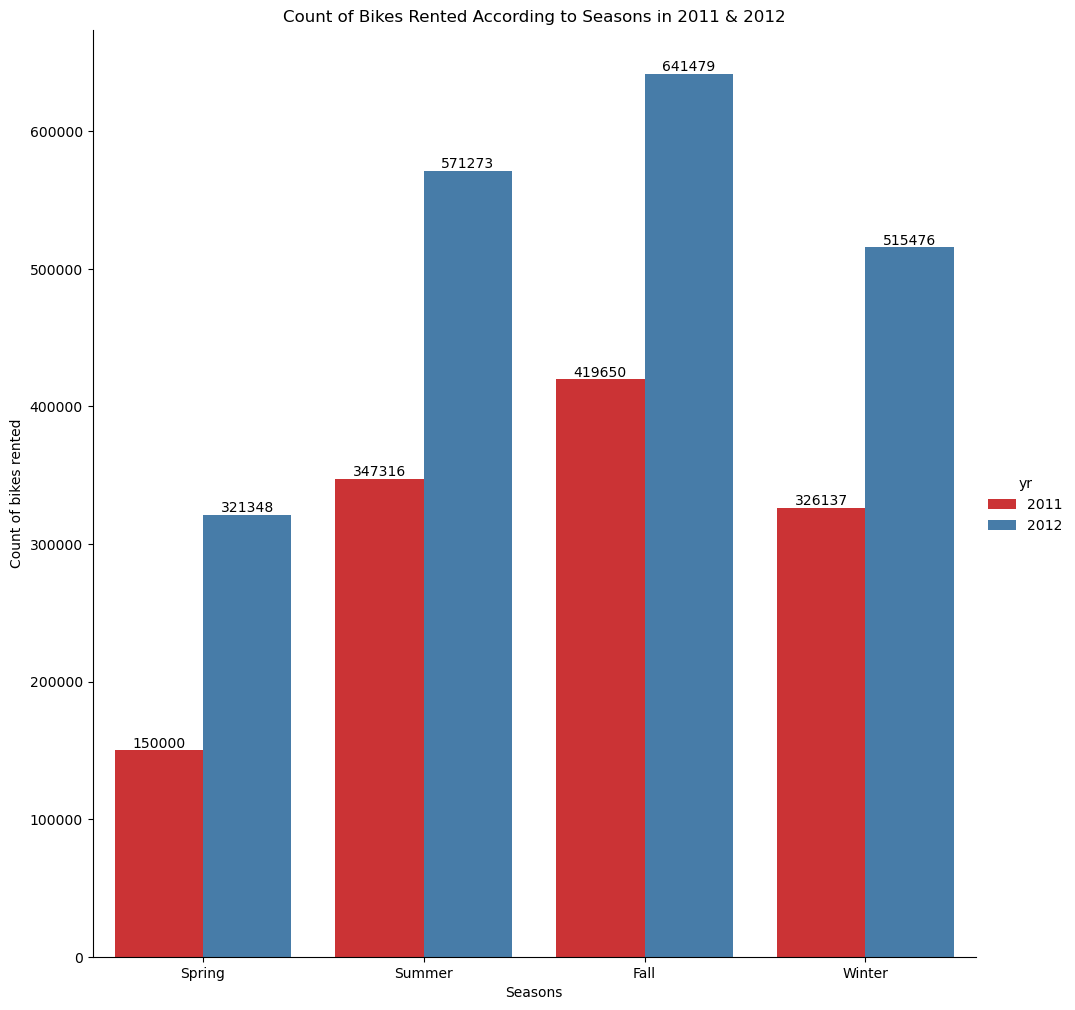

In [34]:
g = sns.catplot(
    data=cnt_per_yr_season, kind="bar",
    x="season_str", y="cnt", hue="yr", palette="Set1", height=10
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Count of Bikes Rented According to Seasons in 2011 & 2012")
plt.xlabel("Seasons")
plt.ylabel("Count of bikes rented")


**Insight:**
- Dari grafik di atas, berdasarkan musim pada tahun 2011 dan 2012, penyewaan paling banyak terjadi pada musim Fall, dan penyewaan paling sedikit adalah pada musim Spring
- Spring 2011 memiliki jumlah penyewaan sepeda sebanyak 150000 dan meningkat hampir 2,8 kali lipat pada Fall 2011 menjadi 419650
- Namun perbadingan Spring 2012 dan Fall 2012 hanya memiliki kenaikan hampir 2 kali lipat, dimana jumlah penyewaan sepeda naik dari 321348 menjadi 641479
- Secara umum terdapat peningkatan jumlah penyewaan sepeda pada tahun 2012 dibandingkan tahun 2011

### Pertanyaan 2:
### Apakah jumlah penyewaan sepeda berbeda secara signifikan pada bukan hari kerja dibandingkan dengan hari kerja?

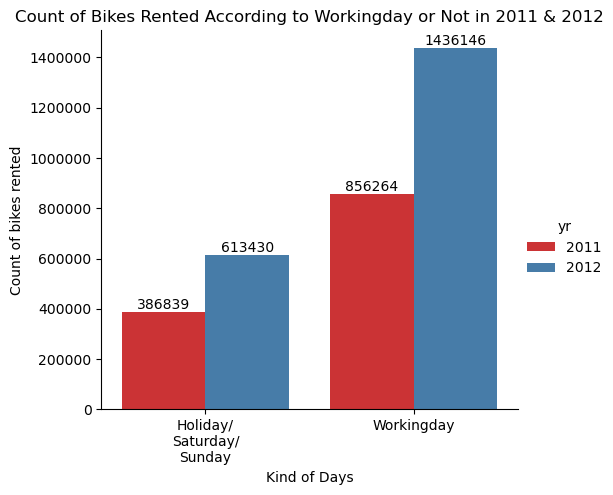

In [36]:
g = sns.catplot(
    data=cnt_per_yr_workingday, kind="bar", hue="yr", palette="Set1",
    x="workingday_str", y="cnt", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fmt = '%d')

plt.title("Count of Bikes Rented According to Workingday or Not in 2011 & 2012")
plt.xlabel("Kind of Days")
plt.ylabel("Count of bikes rented")
plt.ticklabel_format(style='plain', axis='y')

**Insight:**
- Grafik di atas menunjukkan perbedaan jumlah penyewaan sepeda yang cukup signifikan pada saat bukan hari kerja (saat libur / Holiday, hari Sabtu, dan Minggu) dibandingkan dengan hari kerja, yakni terdapat kenaikan 2 kali lipat lebih penyewaan sepeda pada hari kerja
- Jumlah penyewaan sepeda tahun 2011 pada bukan hari kerja adalah 386839, dan naik menjadi 856264 pada hari kerja
- Sedangkan tahun 2012 penyewaan sepeda berjumlah 613430 pada bukan hari kerja, dan meningkat menjadi 1436146 pada hari kerja

## Analisis Lanjutan (Opsional)

### Pertanyaan 3:
### Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?

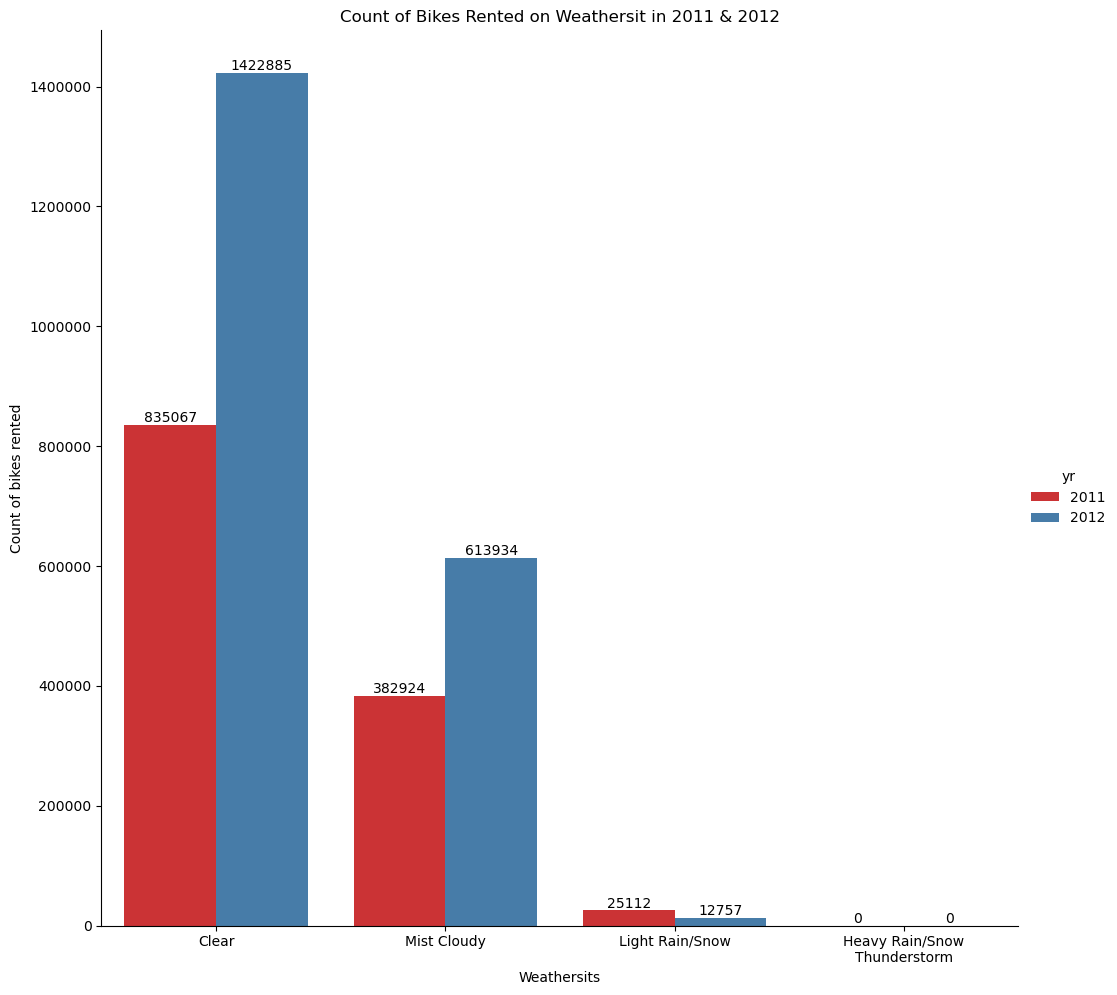

In [38]:
g = sns.catplot(
    data=cnt_per_yr_weathersit, kind="bar",
    x="weathersit_str", y="cnt", hue="yr", palette="Set1", height=10
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fmt = '%d')

plt.title("Count of Bikes Rented on Weathersit in 2011 & 2012")
plt.xlabel("Weathersits")
plt.ylabel("Count of bikes rented")
plt.ticklabel_format(style='plain', axis='y')

**Insight**
- Grafik di atas memberikan informasi kepada kita bahwa cuaca sangat berpengaruh kepada jumlah penyewaan sepeda, dimana saat cuaca sedang baik (Clear), penyewaan sepeda menunjukkan jumlah terbanyak, baik tahun 2011 maupun 2012
- Kemudian jumlah penyewaan tersebut menurun seiring dengan perubahan cuaca yang memburuk, hingga pada akhirnya saat terjadi cuaca ekstrem (Heavy Rain/Snow/Thunderstorm) tidak ada sama sekali orang yang menyewa sepeda untuk beraktivitas
- Menariknya dari grafik di atas adalah saat cuaca sedang turun hujan/salju ringan, pada tahun 2011 menunjukkan jumlah yang lebih banyak daripada tahun 2012 dengan selisih sekitar 2 kali lipat. Padahal seperti yang terdapat pada dataset ini, secara umum jumlah penyewaan sepeda tahun 2012 lebih banyak daripada tahun 2011

### Pertanyaan 4:
### Pada jam-jam berapa saja penyewaan sepeda terjadi paling banyak dan paling sedikit?

Text(34.303374999999996, 0.5, 'Hours')

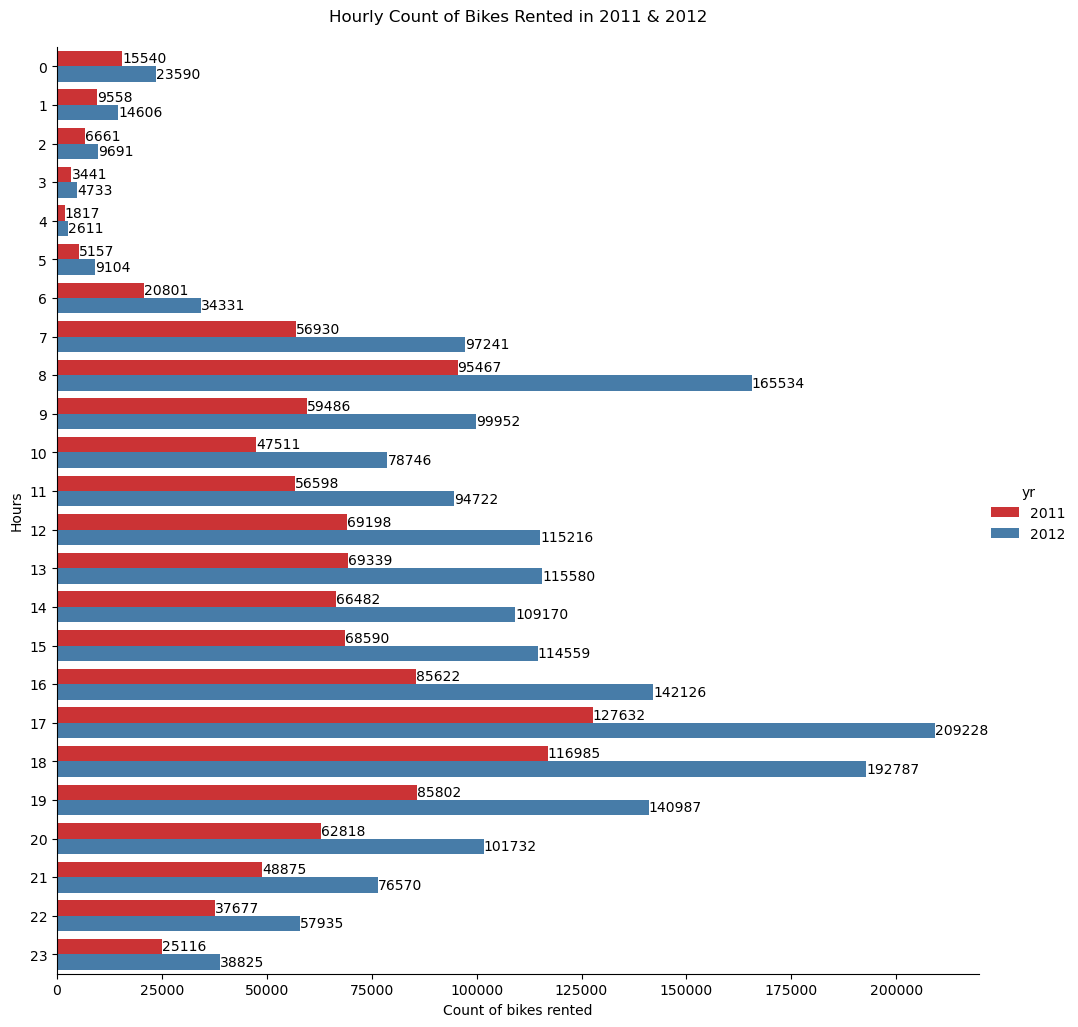

In [40]:
g = sns.catplot(
    data=cnt_per_yr_hr, kind="bar", orient="h",
    x="cnt", y="hr", hue="yr", palette="Set1", height=10,
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fmt = '%d')

plt.title("Hourly Count of Bikes Rented in 2011 & 2012\n")
plt.xlabel("Count of bikes rented")
plt.ylabel("Hours")

**Insight**
- Grafik di atas memberikan informasi bahwa rentang pukul 0-5 adalah waktu dimana penyewaan sepeda paling sedikit terjadi pada tahun 2011 dan 2012. Hal ini menunjukkan bahwa rentang waktu tersebut mayoritas orang-orang sedang tidak melakukan aktivitas, atau bisa kita katakan waktu tersebut adalah normalnya waktu dimana orang-orang sedang beristirahat di rumah mereka masing-masing
- Kemudian jumlah penyewaan sepeda di pagi hari meningkat pada pukul 6, dan naik signifikan pada pukul 7 dan 8. Hal tersebut bisa disimpulkan bahwa pada pukul 7 dan 8 pagi adalah waktu orang-orang mulai melakukan aktivitas di luar rumah seperti berangkat kerja, sekolah, kuliah, dan sebagainya dengan menyewa sepeda
- Lalu pada sore hari, pukul 17 dan 18 adalah waktu dimana penyewaan sepeda paling banyak dalam sehari. Data ini mengisyaratkan bahwa pada waktu tersebut orang-orang sudah mulai pulang bekerja, sekolah, kuliah, dan aktivitas lainnya
- Dan akhirnya jumlah penyewaan sepeda harian semakin menurun seiring semakin larutnya hari

## Conclusion

- Conclusion pertanyaan 1 : 
Penyewaan sepeda berdasarkan musim paling banyak dilakukan pada Fall, dan paling sedikit pada Spring. Hal ini terjadi baik pada tahun 2011 maupun 2012

- Conclusion pertanyaan 2 :
Terdapat perbedaan signifikan jumlah penyewaan sepeda pada hari bukan kerja dibandingkan pada hari kerja. Sehingga sangat direkomendasikan bagi penyewa sepeda yang ingin bepergian untuk memerhatikan apakah hari ini termasuk hari kerja atau bukan, dan bagi penyedia jasa layanan penyewaan sepeda agar dapat menjaga ketersediaan jumlah sepeda yang bisa untuk disewakan. Karena jumlah penyewaan sepeda pada hari kerja jauh lebih banyak dengan selisih 2,8 kali lipat pada 2011 dan 2 kali lipat pada 2012

- Conclusion pertanyaan 3 :
Keadaan cuaca yang baik juga sangat berpengaruh kepada jumlah penyewaan sepeda, dimana semakin baik cuacanya juga semakin banyak jumlah sepeda yang disewakan. Begitu juga saat cuaca buruk, jumlah penyewaan sepeda menjadi semakin sedikit dan turun drastis saat cuaca Light Rain/Snow hingga tidak ada orang yang menyewa sepeda saat cuaca ekstrem. Keadaan ini tentu saja bisa terjadi saat orang-orang mempertimbangkan keselamatan berdasarkan keadaan cuaca pada hari tersebut

- Conclusion pertanyaan 4 :
Sangat disarankan kepada pengguna layanan penyewaan sepeda agar dapat memerhatikan waktu-waktu untuk menyewa sepeda, khususnya saat ingin mulai beraktivitas di pagi hari dan saat akan pulang di sore hari, dikarenakan jumlah penyewaan sepeda yang melonjak pada waktu-waktu tersebut. Hal ini bisa disiasati dengan melakukan booking lebih awal dengan mengatur waktu kapan akan menggunakan sepeda. Misalnya di pagi hari jika ingin menggunakan sepeda pada pukul 7, maka lebih baik melakukan booking sewa pada pukul 5 atau 6 pagi. Begitu juga pada sore hari